C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


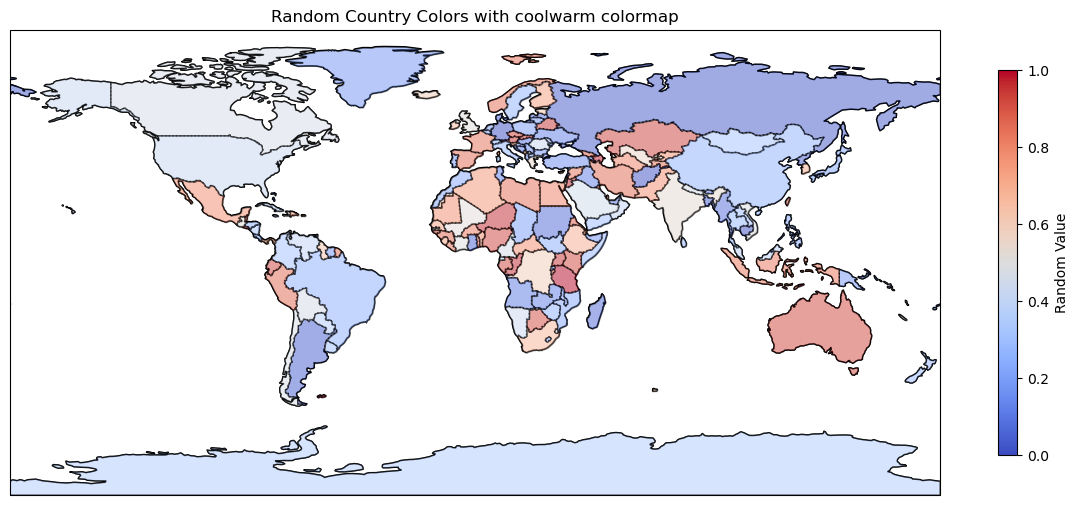

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# 创建figure和axis
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# 添加陆地、海洋、湖泊和河流
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# 读取世界国家shape文件
shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = list(reader.records())

# 创建随机值并绑定到颜色
random_values = np.random.rand(len(countries))
norm = plt.Normalize(0, 1)
cmap = plt.cm.coolwarm

# 绘制每个国家
for country, value in zip(countries, random_values):
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=cmap(norm(value)),
                      edgecolor='k', alpha=0.5)

# 添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Random Value')

plt.title('Random Country Colors with coolwarm colormap')
plt.show()

In [9]:
import numpy as np
import csv
import cartopy.io.shapereader as shpreader

# 读取世界国家shape文件
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = list(reader.records())

# 创建随机值
random_values = np.random.rand(len(countries))

# 将国家名称和随机数值写入CSV文件
output_filepath = "G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv"
with open(output_filepath, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Country", "Random_Value"])
    for country, value in zip(countries, random_values):
        writer.writerow([country.attributes['SOVEREIGNT'], value])

print(f"Data written to {output_filepath}")


Data written to G:\Hangkai\Forest_edge\country_stats\test\country_random_values.csv


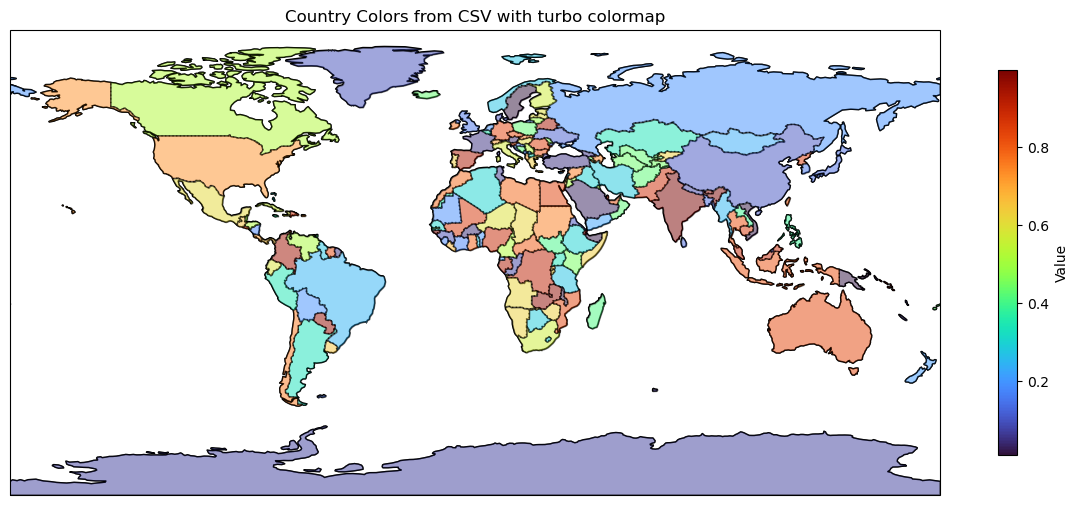

In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Step 1: 读取CSV文件
country_values = {}
with open("G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv", 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        country_values[row[0]] = float(row[1])

# Step 2: 使用cartopy绘制每个国家并根据其值选择颜色
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

cmap = plt.cm.turbo
norm = plt.Normalize(min(country_values.values()), max(country_values.values()))

for country in reader.records():
    sovereign_name = country.attributes['SOVEREIGNT']
    if sovereign_name in country_values:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=cmap(norm(country_values[sovereign_name])),
                          edgecolor='k', alpha=0.5)

# Step 3: 使用turbo色图并添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Value')

plt.title('Country Colors from CSV with turbo colormap')
plt.show()


In [12]:
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
country = next(reader.records())
print(country.attributes)

{'featurecla': 'Admin-0 country', 'scalerank': 0, 'LABELRANK': 2, 'SOVEREIGNT': 'Indonesia', 'SOV_A3': 'IDN', 'ADM0_DIF': 0, 'LEVEL': 2, 'TYPE': 'Sovereign country', 'TLC': '1', 'ADMIN': 'Indonesia', 'ADM0_A3': 'IDN', 'GEOU_DIF': 0, 'GEOUNIT': 'Indonesia', 'GU_A3': 'IDN', 'SU_DIF': 0, 'SUBUNIT': 'Indonesia', 'SU_A3': 'IDN', 'BRK_DIFF': 0, 'NAME': 'Indonesia', 'NAME_LONG': 'Indonesia', 'BRK_A3': 'IDN', 'BRK_NAME': 'Indonesia', 'BRK_GROUP': None, 'ABBREV': 'Indo.', 'POSTAL': 'INDO', 'FORMAL_EN': 'Republic of Indonesia', 'FORMAL_FR': None, 'NAME_CIAWF': 'Indonesia', 'NOTE_ADM0': None, 'NOTE_BRK': None, 'NAME_SORT': 'Indonesia', 'NAME_ALT': None, 'MAPCOLOR7': 6, 'MAPCOLOR8': 6, 'MAPCOLOR9': 6, 'MAPCOLOR13': 11, 'POP_EST': 270625568.0, 'POP_RANK': 17, 'POP_YEAR': 2019, 'GDP_MD': 1119190, 'GDP_YEAR': 2019, 'ECONOMY': '4. Emerging region: MIKT', 'INCOME_GRP': '4. Lower middle income', 'FIPS_10': 'ID', 'ISO_A2': 'ID', 'ISO_A2_EH': 'ID', 'ISO_A3': 'IDN', 'ISO_A3_EH': 'IDN', 'ISO_N3': '360', 'IS

In [19]:
import cartopy.io.shapereader as shpreader
from shapely.ops import transform
from shapely.geometry import shape
import pyproj

# 使用Mollweide的PROJ字符串来定义转换
mollweide_proj = "+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
project = pyproj.Transformer.from_crs(
    pyproj.CRS('EPSG:4326'),  # 原始的经纬度坐标系
    pyproj.CRS(mollweide_proj),
    always_xy=True).transform

shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

for country in reader.records():
    # 为每个国家的形状应用投影转换
    geom_transformed = transform(project, shape(country.geometry))
    
    # 计算面积，并将其从平方米转换为平方公里
    area_km2 = geom_transformed.area / 1e6  
    print(f"{country.attributes['SOVEREIGNT']}: {area_km2:.2f} km²")

Indonesia: 1892366.61 km²
Malaysia: 330072.24 km²
Chile: 738017.59 km²
Bolivia: 1092895.46 km²
Peru: 1298027.44 km²
Argentina: 2789349.10 km²
United Kingdom: 127.72 km²
Cyprus: 5407.60 km²
India: 3165389.01 km²
China: 9394405.83 km²
Israel: 22169.56 km²
Israel: 6092.42 km²
Lebanon: 10029.58 km²
Ethiopia: 1134602.92 km²
South Sudan: 630939.47 km²
Somalia: 474931.34 km²
Kenya: 589637.14 km²
Malawi: 120116.51 km²
United Republic of Tanzania: 947673.45 km²
Syria: 186367.13 km²
Somaliland: 168470.47 km²
France: 637161.22 km²
Suriname: 146090.76 km²
Guyana: 212614.40 km²
South Korea: 98741.41 km²
North Korea: 122519.75 km²
Morocco: 593756.85 km²
Western Sahara: 90899.97 km²
Costa Rica: 51475.49 km²
Nicaragua: 129466.58 km²
Republic of the Congo: 347204.11 km²
Democratic Republic of the Congo: 2340650.46 km²
Bhutan: 40578.24 km²
Ukraine: 571456.35 km²
Belarus: 207094.83 km²
Namibia: 826670.85 km²
South Africa: 1224180.47 km²
France: 68.65 km²
Netherlands: 23.49 km²
Oman: 312789.26 km²
Uzbekis

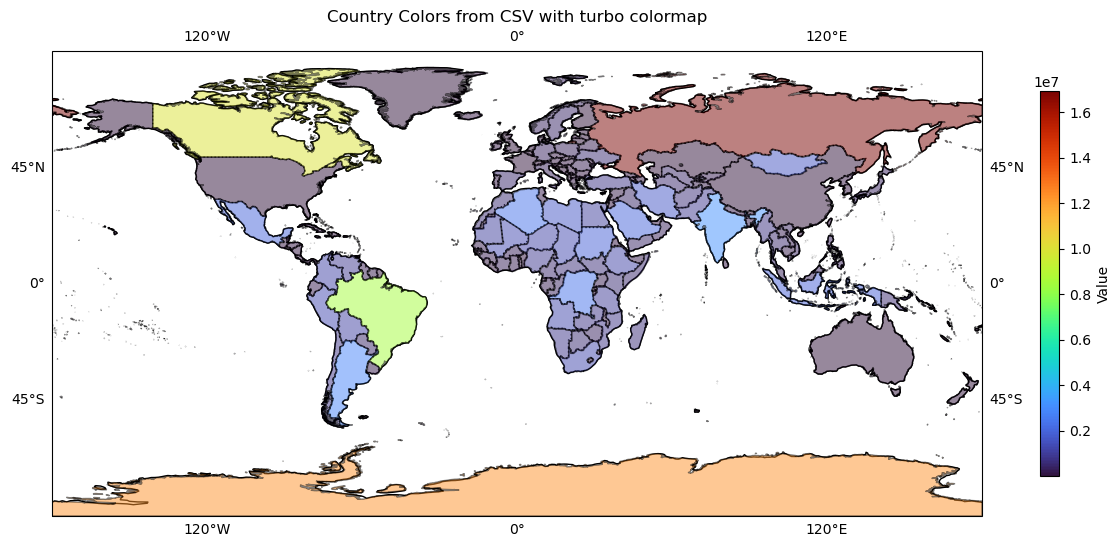

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Step 1: 读取CSV文件
country_values = {}
with open("G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv", 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        country_values[row[0]] = float(row[2])

# Step 2: 使用cartopy绘制每个国家并根据其值选择颜色
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  linewidth=0, color='black', alpha=1, 
                  xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                  ylocs=[-90, -45, 0, 45, 90])
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

cmap = plt.cm.turbo
norm = plt.Normalize(min(country_values.values()), max(country_values.values()))

for country in reader.records():
    sovereign_name = country.attributes['SOVEREIGNT']
    if sovereign_name in country_values:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=cmap(norm(country_values[sovereign_name])),
                          edgecolor='k', alpha=0.5)

# Step 3: 使用turbo色图并添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Value')

plt.title('Country Colors from CSV with turbo colormap')
plt.show()
